# <font color=#023F7C> **Machine Learning, Explainability and Deep Learning** </font>

<font color=#023F7C>**Hi! PARIS DataBootcamp 2023 🚀**</font> <br>


<img src = https://www.hi-paris.fr/wp-content/uploads/2020/09/logo-hi-paris-retina.png width = "300" height = "200" >



**Before you start to working on this notebook ⚠️**: <br>
Please download/copy this notebook from `hfactory_magic_folders\course` and drop it into your own directory `my_work` on HFactory. <br>
If you don't, you won't be able to save the modifications you've made on this notebook.

**How to work with this notebook ? 📝** <br>
Here are some guidelines on how you should work on this notebook during the week. <br>
*You don't need to finish the whole notebook before sending it to us on Friday*
- Wednesday: Work on section 1. and 2. (Import dataset and Machine Learning)
- Thursday: Finish section 2., work on section 3. and 4. (ML, Explainability, Deep Learning)
- Friday morning: Finish the notebook as best you can for the final deliverable at 12:00pm 



**Bootcamp deliverables** 💯: <br>
Send us the completed notebook before 12:00pm (midi) on Friday at `data-event@hi-paris.fr`<br>
*Don't forget to also send us the powerpoint deliverable on Friday*
- Send a single notebook per group. 
- Add the names of the members of your group in your email submission 


**Need help ? 🙏** <br>
You can find code examples in this morning's <b>Machine Learning</b> and <b>Optimisation and model evaluation</b> theortical courses. <br>
If you are really struggling with this section, you can also visit the `Data_Science_crash_course.ipynb` notebook in the Pre-bootcamp folder on HFactory.

## **1. Import libraries and clean dataset**

**Let's start by importing the libraries we used in two previous notebooks.**
 

In [1]:
import pandas as pd
#import time
import numpy as np
pd.set_option('display.max_columns', None) #Show all columns

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

**Now, let's import `scikit-learn` functions for classification models, data preprocessing and performance metrics.** 

In [2]:
# Classification models
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier

# Multiclass classification 
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

# Preprocessing tools
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split

# Performance metrics
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, classification_report, explained_variance_score
from sklearn.metrics import make_scorer, mean_absolute_error, mean_absolute_percentage_error

# Improve your model
# Improve your model
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

**Finally, import the `dataset_train_clean.csv` dataset you cleaned/worked on in `Data_Clean.ipynb` and `Dataviz.ipynb`** <br>
*Make sure you name the loaded dataframe `dataset` in the notebook !*


**If you weren't able to save/create `dataset_train_clean.csv` then run the following code.**


In [3]:
path=r'~/hfactory_magic_folders/course/Dataset/dataset_train.csv'
#path=r"dataset_train.csv"

# Import the csv file
dataset = pd.read_csv(path,encoding='latin-1',sep=';')

# Clean the dataframe 
to_drop=['Unnamed: 0','Customer Email','Customer Fname','Customer Lname','Customer Password','Customer Street','Order Zipcode','Product Description', "Sales per customer","Product Card Id"]
dataset=dataset.drop(to_drop,axis=1)
dataset=dataset.dropna().reset_index(drop=True)

**You can drop more columns at this step if you don't think they will be useful in the Machine Learning model.**

In [88]:
print("The ratio of late deliveries is " + str(dataset['Delivery Status'].value_counts()[0] / dataset['Delivery Status'].count() *100))

The ratio of late deliveries is 54.41774928543468


# **2. Machine Learning**

**You can chose either `Late_delivery_risk` or `Delivery_status` as the variable to predict.**
- Predict `Late_delivery_risk` to try binary classification (Beginner level)
- Predict `Delivery_Status` to try multi-class classification (Intermediate/Advanced level)



**Important information ⚠️**: <br>
If you pick `Late_delivery_risk` then `Delivery_status` should be deleted from the dataset (and vice-versa). <br>
If you need help doing this, the next cell will do it for you.
- Keep `binary_classification=True` if you pick binary classification.
- Change it to `binary_classification=False` if you pick multi-class classification

In [4]:
# Choose your figther
binary_classification=False

if binary_classification is True:
    dataset=dataset.drop(columns=['Delivery Status'])
    name_label=['Late_delivery_risk']
else:
    dataset=dataset.drop(columns=['Late_delivery_risk'])
    name_label=['Delivery Status_Advance shipping', 'Delivery Status_Late delivery','Delivery Status_Shipping canceled', 'Delivery Status_Shipping on time']

### **2.1 Data Preprocessing**


**Question 1:** <br>**Transform the categorical variables (with less than 15 unique values) into numerical variables with OneHotEncoding (OHE).** <br>
*Make sure you don't include `Late_delivery_risk` with the variables to transform with OneHotencoding (if you are going to do binary classification)* <br>
*You can go this [page](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) for more info on how to use scikit-learn's `OneHotEncoder` function.*




You can run the next cell if you are struggling to select the correct variables to Onehotencode.



In [5]:
## Run this following code if you need help selecting variables to onehotencode

df_continuous=dataset.select_dtypes(include=["float64"])
df_categorical=dataset.select_dtypes(include=["object","int64"])
nb_unique_value_max=15

# List of columns to transform with OneHotEncoding
to_OHE=[key for key in df_categorical.keys() if len(df_categorical[key].drop_duplicates())<nb_unique_value_max]
print(to_OHE)

# Remove Late_delivery_risk or Delivery Status from list of columns to transform with OHE
if "Late_delivery_risk" in to_OHE:
    to_OHE.remove("Late_delivery_risk")
    
# if "Delivery Status" in to_OHE:
#     to_OHE.remove("Delivery Status")

['Type', 'Delivery Status', 'Customer Country', 'Customer Segment', 'Department Id', 'Department Name', 'Market', 'Order Item Quantity', 'Order Status', 'Product Status', 'Shipping Mode']


In [6]:
enc = OneHotEncoder(sparse_output=False)
ohe_array = enc.fit_transform(df_categorical[to_OHE])
column_names = enc.get_feature_names_out(to_OHE)


df_ohe = pd.DataFrame(ohe_array, columns=column_names, index=df_categorical.index)

df_ohe.head()

,Type_CASH,Type_DEBIT,Type_PAYMENT,Type_TRANSFER,Delivery Status_Advance shipping,Delivery Status_Late delivery,Delivery Status_Shipping canceled,Delivery Status_Shipping on time,Customer Country_EE. UU.,Customer Country_Puerto Rico,Customer Segment_Consumer,Customer Segment_Corporate,Customer Segment_Home Office,Department Id_2,Department Id_3,Department Id_4,Department Id_5,Department Id_6,Department Id_7,Department Id_8,Department Id_9,Department Id_10,Department Id_11,Department Id_12,Department Name_Apparel,Department Name_Book Shop,Department Name_Discs Shop,Department Name_Fan Shop,Department Name_Fitness,Department Name_Footwear,Department Name_Golf,Department Name_Health and Beauty,Department Name_Outdoors,Department Name_Pet Shop,Department Name_Technology,Market_Africa,Market_Europe,Market_LATAM,Market_Pacific Asia,Market_USCA,Order Item Quantity_1,Order Item Quantity_2,Order Item Quantity_3,Order Item Quantity_4,Order Item Quantity_5,Order Status_CANCELED,Order Status_CLOSED,Order Status_COMPLETE,Order Status_ON_HOLD,Order Status_PAYMENT_REVIEW,Order Status_PENDING,Order Status_PENDING_PAYMENT,Order Status_PROCESSING,Order Status_SUSPECTED_FRAUD,Product Status_0,Shipping Mode_First Class,Shipping Mode_Same Day,Shipping Mode_Second Class,Shipping Mode_Standard Class
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


**Concatenate the OneHotencoded variables/dataframe with the original dataframe using `pd.concat([...],axis=1)`.<br>**
*Make sure to drop the columns you transformed with OneHotEncoding in the concatenated dataframe*

In [7]:
df_transformed = pd.concat([dataset, df_ohe], axis=1)
df_transformed

,Type,Benefit per order,Delivery Status,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Category Id,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Type_CASH,Type_DEBIT,Type_PAYMENT,Type_TRANSFER,Delivery Status_Advance shipping,Delivery Status_Late delivery,Delivery Status_Shipping canceled,Delivery Status_Shipping on time,Customer Country_EE. UU.,Customer Country_Puerto Rico,Customer Segment_Consumer,Customer Segment_Corporate,Customer Segment_Home Office,Department Id_2,Department Id_3,Department Id_4,Department Id_5,Department Id_6,Department Id_7,Department Id_8,Department Id_9,Department Id_10,Department Id_11,Department Id_12,Department Name_Apparel,Department Name_Book Shop,Department Name_Discs Shop,Department Name_Fan Shop,Department Name_Fitness,Department Name_Footwear,Department Name_Golf,Department Name_Health and Beauty,Department Name_Outdoors,Department Name_Pet Shop,Department Name_Technology,Market_Africa,Market_Europe,Market_LATAM,Market_Pacific Asia,Market_USCA,Order Item Quantity_1,Order Item Quantity_2,Order Item Quantity_3,Order Item Quantity_4,Order Item Quantity_5,Order Status_CANCELED,Order Status_CLOSED,Order Status_COMPLETE,Order Status_ON_HOLD,Order Status_PAYMENT_REVIEW,Order Status_PENDING,Order Status_PENDING_PAYMENT,Order Status_PROCESSING,Order Status_SUSPECTED_FRAUD,Product Status_0,Shipping Mode_First Class,Shipping Mode_Same Day,Shipping Mode_Second Class,Shipping Mode_Standard Class
0,DEBIT,91.250000,Advance shipping,73,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,PR,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,TRANSFER,-249.089996,Late delivery,73,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,PR,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,CASH,-247.779999,Shipping on time,73,Sporting Goods,San Jose,EE. UU.,19491,Consumer,CA,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,DEBIT,22.860001,Advance shipping,73,Sporting Goods,Los Angeles,EE. UU.,19490,Home Office,CA,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,

In [8]:
df_transformed = df_transformed.drop(columns=to_OHE)
df_transformed

,Benefit per order,Category Id,Category Name,Customer City,Customer Id,Customer State,Customer Zipcode,Latitude,Longitude,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Product Category Id,Product Image,Product Name,Product Price,shipping date (DateOrders),Type_CASH,Type_DEBIT,Type_PAYMENT,Type_TRANSFER,Delivery Status_Advance shipping,Delivery Status_Late delivery,Delivery Status_Shipping canceled,Delivery Status_Shipping on time,Customer Country_EE. UU.,Customer Country_Puerto Rico,Customer Segment_Consumer,Customer Segment_Corporate,Customer Segment_Home Office,Department Id_2,Department Id_3,Department Id_4,Department Id_5,Department Id_6,Department Id_7,Department Id_8,Department Id_9,Department Id_10,Department Id_11,Department Id_12,Department Name_Apparel,Department Name_Book Shop,Department Name_Discs Shop,Department Name_Fan Shop,Department Name_Fitness,Department Name_Footwear,Department Name_Golf,Department Name_Health and Beauty,Department Name_Outdoors,Department Name_Pet Shop,Department Name_Technology,Market_Africa,Market_Europe,Market_LATAM,Market_Pacific Asia,Market_USCA,Order Item Quantity_1,Order Item Quantity_2,Order Item Quantity_3,Order Item Quantity_4,Order Item Quantity_5,Order Status_CANCELED,Order Status_CLOSED,Order Status_COMPLETE,Order Status_ON_HOLD,Order Status_PAYMENT_REVIEW,Order Status_PENDING,Order Status_PENDING_PAYMENT,Order Status_PROCESSING,Order Status_SUSPECTED_FRAUD,Product Status_0,Shipping Mode_First Class,Shipping Mode_Same Day,Shipping Mode_Second Class,Shipping Mode_Standard Class
0,91.250000,73,Sporting Goods,Caguas,20755,PR,725.0,18.251453,-66.037056,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,2/3/2018 22:56,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-249.089996,73,Sporting Goods,Caguas,19492,PR,725.0,18.279451,-66.037064,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,327.75,311.359985,-249.089996,South Asia,Rajastán,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,1/18/2018 12:27,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-247.779999,73,Sporting Goods,San Jose,19491,CA,95125.0,37.292233,-121.881279,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,327.75,309.720001,-247.779999,South Asia,Rajastán,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,1/17/2018 12:06,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,22.860001,73,Sporting Goods,Los Angeles,19490,CA,90027.0,34.125946,-118.291016,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,327.75,304.809998,22.860001,Oceania,Queensland,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,1/16/2018 11:45,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,134.210007,73,Sporting Goods,Caguas,19489,PR,725.0,18.253769,-66.037048,Townsville,Australi

**Question 2:** <br>
**Transform the remaining categorical variables (those with more than 15 unique values) using `LabelEncoder`**. <br>
If you need help selecting categorical variables with more than 15 unique values, run the following cell



In [9]:
to_label_encoder=[key for key in df_categorical.keys() if key not in to_OHE]
print(to_label_encoder)

['Category Id', 'Category Name', 'Customer City', 'Customer Id', 'Customer State', 'Order City', 'Order Country', 'Order Customer Id', 'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id', 'Order Item Id', 'Order Region', 'Order State', 'Product Category Id', 'Product Image', 'Product Name', 'shipping date (DateOrders)']


*Note: The `LabelEncoder` function can only transform 1 column at a time, where as `OneHotEncoder` can directly transform multiple columns.* <br>

In [10]:
label_encoders = {}
for col in to_label_encoder:
    le = LabelEncoder()
    df_transformed[col] = le.fit_transform(df_transformed[col])
    label_encoders[col] = le

#df_final = pd.concat([df_transformed.drop(columns=to_label_encoder), df_categorical[to_label_encoder]], axis=1)
#df_final
df_transformed

,Benefit per order,Category Id,Category Name,Customer City,Customer Id,Customer State,Customer Zipcode,Latitude,Longitude,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Product Category Id,Product Image,Product Name,Product Price,shipping date (DateOrders),Type_CASH,Type_DEBIT,Type_PAYMENT,Type_TRANSFER,Delivery Status_Advance shipping,Delivery Status_Late delivery,Delivery Status_Shipping canceled,Delivery Status_Shipping on time,Customer Country_EE. UU.,Customer Country_Puerto Rico,Customer Segment_Consumer,Customer Segment_Corporate,Customer Segment_Home Office,Department Id_2,Department Id_3,Department Id_4,Department Id_5,Department Id_6,Department Id_7,Department Id_8,Department Id_9,Department Id_10,Department Id_11,Department Id_12,Department Name_Apparel,Department Name_Book Shop,Department Name_Discs Shop,Department Name_Fan Shop,Department Name_Fitness,Department Name_Footwear,Department Name_Golf,Department Name_Health and Beauty,Department Name_Outdoors,Department Name_Pet Shop,Department Name_Technology,Market_Africa,Market_Europe,Market_LATAM,Market_Pacific Asia,Market_USCA,Order Item Quantity_1,Order Item Quantity_2,Order Item Quantity_3,Order Item Quantity_4,Order Item Quantity_5,Order Status_CANCELED,Order Status_CLOSED,Order Status_COMPLETE,Order Status_ON_HOLD,Order Status_PAYMENT_REVIEW,Order Status_PENDING,Order Status_PENDING_PAYMENT,Order Status_PROCESSING,Order Status_SUSPECTED_FRAUD,Product Status_0,Shipping Mode_First Class,Shipping Mode_Same Day,Shipping Mode_Second Class,Shipping Mode_Standard Class
0,91.250000,47,40,65,18901,34,725.0,18.251453,-66.037056,327,40,18901,5158,56548,114,13.110000,0.04,135394,327.75,0.29,327.75,314.640015,91.250000,15,471,47,78,78,327.75,23289,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-249.089996,47,40,65,17872,34,725.0,18.279451,-66.037064,386,39,17872,1026,55519,114,16.389999,0.05,134365,327.75,-0.80,327.75,311.359985,-249.089996,13,836,47,78,78,327.75,1972,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-247.779999,47,40,451,17871,3,95125.0,37.292233,-121.881279,386,39,17871,1025,55518,114,18.030001,0.06,134364,327.75,-0.80,327.75,309.720001,-247.779999,13,836,47,78,78,327.75,1764,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,22.860001,47,40,284,17870,3,90027.0,34.125946,-118.291016,3182,4,17870,1024,55517,114,22.940001,0.07,134363,327.75,0.08,327.75,304.809998,22.860001,11,830,47,78,78,327.75,1552,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,134.210007,47,40,65,17869,34,725.0,18.253769,-66.037048,3182,4,17869,1023,55516,114,29.500000,0.09,134362,327.75,0.45,327.75,298.250000,134.210007,11,830,47,78,78,327.75,1353,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

**Question 3 (Bonus)**: <br>
**Try other data preprocessing methods on the data (StandardScaler, MinMaxScaler...).**<br>
*Scale continuous feature variables (with a float type), not categorical*

**Question 4**: <br>
**Create a `y` variable with the target variable in the dataset you've chosen to predict.** <br>

In [11]:
y=df_transformed[name_label] #.to_numpy()
y

,Delivery Status_Advance shipping,Delivery Status_Late delivery,Delivery Status_Shipping canceled,Delivery Status_Shipping on time
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
135392,0.0,0.0,0.0,1.0
135393,0.0,0.0,0.0,1.0
135394,0.0,1.0,0.0,0.0
135395,0.0,1.0,0.0,0.0


**Create a `X` variable with the remaining feature variables of your dataset.** <br>

In [12]:
X=df_transformed.drop(name_label, axis=1) #.to_numpy()
# X=X.to_numpy()


**Question 5**: <br>
**Split X and y into training and validation/test sets using scikit-learn's `train_test_split()` function. <br>**

*Note: Add `stratify=y` to make sure your splits are stratified and `random_state=42`*
- *The training set will be used to train/fit our data to the model*
- *The test/validation set will be used to quantify the performance of the model on new data*

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
# y_train = np.reshape(y_train, (1, y_train.size))[0]
# y_train=y_train.flatten()
# X_train.size
y_train

,Delivery Status_Advance shipping,Delivery Status_Late delivery,Delivery Status_Shipping canceled,Delivery Status_Shipping on time
11021,0.0,1.0,0.0,0.0
11810,0.0,0.0,1.0,0.0
113044,1.0,0.0,0.0,0.0
14473,1.0,0.0,0.0,0.0
27540,0.0,0.0,0.0,1.0
...,...,...,...,...
99334,1.0,0.0,0.0,0.0
35080,0.0,0.0,0.0,1.0
11976,1.0,0.0,0.0,0.0
117490,0.0,0.0,1.0,0.0


### **2.2 Train/fit a Machine Learning model**
Now that our dataset is clean and has the right format, we can use it train Machine Learning models with this data.





**Question 6**: <br>
**Train Logistic Regression, DecisionTree and Random forest models using scikit-learn's `.fit()` method. <br>**
- Logistic Regression in scikit-learn: `LogisticRegression()` 
- Decision Tree in scikit-learn: `DecisionTreeClassifier()`
- Random Forest in scikit-learn: `RandomForestClassifier()`



In [14]:
lr = OneVsRestClassifier(LogisticRegression(max_iter=1000, multi_class="ovr"))
lr.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000,
                                                 multi_class='ovr'))

In [15]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
# cross_val_score(clf, X_train, y_train)
# from sklearn.tree import export_graphviz
# import graphviz

# dot_data = export_graphviz(clf, out_file=None, 
#                            feature_names=X_train.columns,  
#                            class_names=True,
#                            filled=True)

# graph = graphviz.Source(dot_data)  
# graph.view()

DecisionTreeClassifier(random_state=42)

In [16]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Question 7**: <br>
**Compute the probability of the predicted values for the trained models with `.predict_proba()`**. 


In [36]:
log_reg_proba = lr.predict_proba(X_test)
log_reg_proba

array([[0.25525353, 0.54017121, 0.04031992, 0.18433152],
       [0.22892496, 0.54090753, 0.02700492, 0.18808075],
       [0.23810335, 0.5446019 , 0.03651956, 0.18913164],
       ...,
       [0.2498629 , 0.54114368, 0.0577734 , 0.2224503 ],
       [0.2160927 , 0.54045643, 0.02200194, 0.15558721],
       [0.23827374, 0.53741197, 0.05257289, 0.20365555]])

**Question 8 (Bonus)**: <br>
**Now do the same (train and predict proba) with two other classification models.** <br>

### **2.3 Evaluate/test the performance of the models**

**Question 9**: <br>
**Compute the AUC score of the trained models with `roc_auc_score()`**.

In [40]:
roc_auc_score(y_test, log_reg_proba, multi_class='ovr') #, average='macro')

0.503780707313644

In [46]:
auc_scores = []
for i, y_pred in enumerate(clf_proba):
    auc = roc_auc_score(y_test.to_numpy()[:, i], y_pred[:, 1])
    auc_scores.append(auc)

average_auc = sum(auc_scores) / len(auc_scores)
average_auc

0.8570809370861832

In [49]:
auc_scores = []
for i,y_pred in enumerate(rand_forest_proba):
    auc = roc_auc_score(y_test.to_numpy()[:, i], y_pred[:, 1])
    auc_scores.append(auc)

average_auc = sum(auc_scores) / len(auc_scores)
average_auc

0.9250240126702025

**If the AUC score of your models are low, here are some tips/ideas of how you can improve their performances:**
- **You can retrain the models in Question 6 and 7 with different parameters.** <br>
- **You can drop columns or include more in the dataset**
- **You can scale the dataset with `StandardScaler` or `MinMaxScaler`**
- **You can try to find a model's optimal parameters with `GridSearch`, `RandomSearch`, `crossvalscore` (Section 2.4)**

**Question 10**: <br>
**Display the ROC curve of the models you've trained with `roc_curve()` and add their AUC score on the plot.** <br>


27080


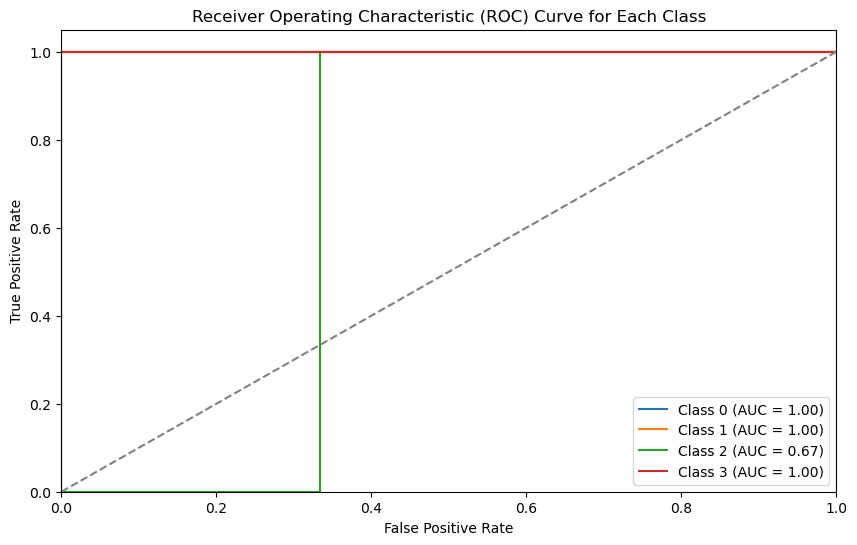

In [77]:
from sklearn.metrics import auc
fpr_list = []
tpr_list = []
threshold_list = []
roc_auc_list = []

print(len(log_reg_proba))
for i, y_pred in enumerate(log_reg_proba):
    # auc = roc_auc_score(y_test.to_numpy()[:, i], y_pred[:, 1])
    # print(y_test.to_numpy()[i, :])
    # print(y_pred)
    fpr, tpr, threshold = roc_curve(y_test.to_numpy()[i], y_pred)
    roc_auc = auc(fpr, tpr)
    
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    threshold_list.append(threshold)
    roc_auc_list.append(roc_auc)

plt.figure(figsize=(10, 6))

# print(clf_proba)

for i in range(len(clf_proba)):
    plt.plot(fpr_list[i], tpr_list[i], label=f'Class {i} (AUC = {roc_auc_list[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Each Class')
plt.legend(loc='lower right')
plt.show()

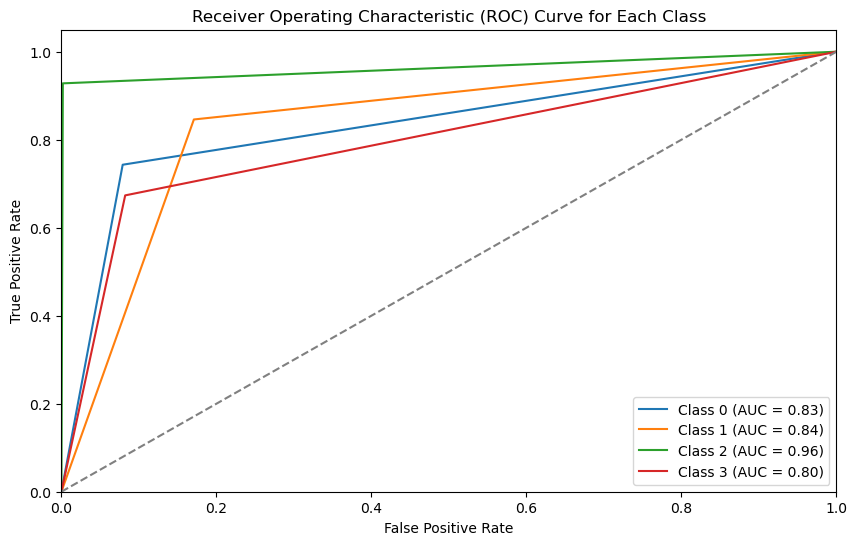

In [68]:
from sklearn.metrics import auc
fpr_list = []
tpr_list = []
threshold_list = []
roc_auc_list = []

for i, y_pred in enumerate(clf_proba):
    # auc = roc_auc_score(y_test.to_numpy()[:, i], y_pred[:, 1])
    fpr, tpr, threshold = roc_curve(y_test.to_numpy()[:, i], y_pred[:, 1])
    roc_auc = auc(fpr, tpr)
    
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    threshold_list.append(threshold)
    roc_auc_list.append(roc_auc)

plt.figure(figsize=(10, 6))

# print(clf_proba)

for i in range(len(clf_proba)):
    plt.plot(fpr_list[i], tpr_list[i], label=f'Class {i} (AUC = {roc_auc_list[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Each Class')
plt.legend(loc='lower right')
plt.show()

**Question 11**: <br>
**Create a confusion matrix for the two models with the best AUC score.** <br>
**Then, use `sns.heatmap()` to plot the confusion matrix**. <br>

*You need to compute the prediction of the model with `.predict()` to compute the confusion matrix*

### **2.4 Upgrade your model! (Bonus)**

**Use Grid Search, Cross validation and/or Random Search to find the optimal parameters for your model(s).** <br>
*Don't use these optimization methods on every model you've tested, just try them on the best model you've tested.* <br>
*For `GridSearchCV`, use the parameter `scoring='roc_auc'` to use the AUC score as the performance metric.*



## **3. Explainability with shap**

The `shap` library (SHapley Additive exPlanations) is a Python library used for explaining the output of machine learning models. <br> It provides a unified framework for interpreting complex models and understanding the contributions of individual features to model predictions. <br> 

Shap is particularly useful for understanding black-box models like boosting, random forests, and deep neural networks, among others. <br>
It can also be used with any classification model.

**Let's install and import the shap library.**

In [ ]:
!pip install shap

In [ ]:
import shap
np.bool=bool

Shap is very heavy and takes a long time to compute. <br> 
To facilitate execution and reduce computing time, we'll work on the **first 1000 rows** of X_train. 

In [ ]:
dataset_shap = X_train[:1000]

**Question 10**: <br>
**Create an object that can compute the shap values using `shap.Explainer`** <br>


**Now, compute the shap values of a trained model with `.shap_values()`.** <br>
Save the computed shap values in a `shap_values` variable.

**Question 11**: <br>
**Create multiple shap summary plots using `shap.summary_plot()`**:
- Create the first plot with `shap_values` 
- Create the second plot with `shap_values[0]` and `plot_type="dot"` 

**Question 12 (Bonus)**: <br>
**Display other shap plots**

## **4. Deep Learning (Bonus)**

**We will start by importing one of Python's Deep Learning libraries `tensorflow`/`keras`.**

In [ ]:
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

**Now should run the following cells to prepare the data to train a Deep Learning model.** <br>
*`dataset` should be the dataframe you transformed with data pre-processing (Onehotencoded, LabelEncoder,...).* 

In [ ]:
dataset_DL = dataset.copy()

In [ ]:
col_names = list(dataset_DL.keys())
col_names_replace = [sub.replace(" ", "_") for sub in col_names]
col_names_replace = [sub.replace("(", "_") for sub in col_names_replace]
col_names_replace = [sub.replace(")", "") for sub in col_names_replace]
col_names_replace[-5:]

['Order_Item_Profit_Ratio',
 'Sales',
 'Order_Item_Total',
 'Order_Profit_Per_Order',
 'Product_Price']

In [ ]:
dict_map = {}
for key,value in zip(col_names, col_names_replace):
  dict_map[key] = value

In [ ]:
dataset_DL.columns = dataset_DL.columns.map(dict_map)

In [ ]:
name_label='Late_delivery_risk'
train, test = train_test_split(dataset_DL, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')
X_dataset=dataset_DL.drop([name_label],axis=1)

86653 train examples
21664 validation examples
27080 test examples


In [ ]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop(name_label)
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

In [ ]:
feature_columns = []
# numeric cols
for header in X_dataset.keys():
  feature_columns.append(feature_column.numeric_column(header))

In [ ]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [ ]:
train, test = train_test_split(dataset_DL, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)

In [ ]:
batch_size = 32 # A small batch sized is used for demonstration purposes
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

**Question 14** <br>
**Make a small neural network model using `tensorflow`/`keras`, and print the accuracy**

*Note: You can use the following elements to train the neural network* <br>
- *`tf.keras.Sequential`*
- *`layers.Dense(INTEGER, activation='relu')`*,
- *`tf.keras.losses.BinaryCrossentropy`*
- *`model.compile(optimizer='adam', ...)`* 
- *`model.fit`*
- *`model.evaluate`* with epoch ~= 10